<center><h1> Projeto de Machine Learning </h1><center>
<center><h1>Previsão de Chuvas na Austrália</h1><center>

------------------------------------------------
<center>Eduardo Selber, Henrique Badin e Luca Caruso<center>

## Preparando o ambiente

In [18]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
#Carregando o dataset
df = pd.read_csv("weatherAUS.csv")
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


                                             |          | [  0%]   00:00 -> (? left)


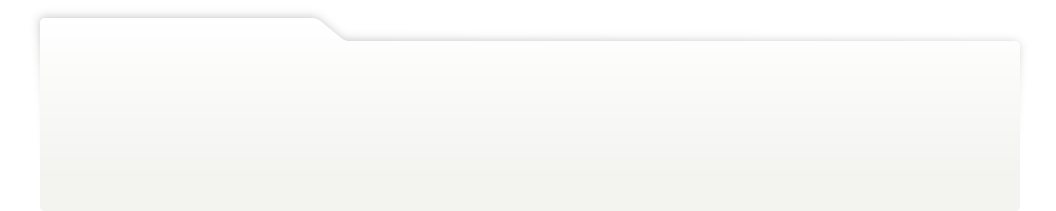
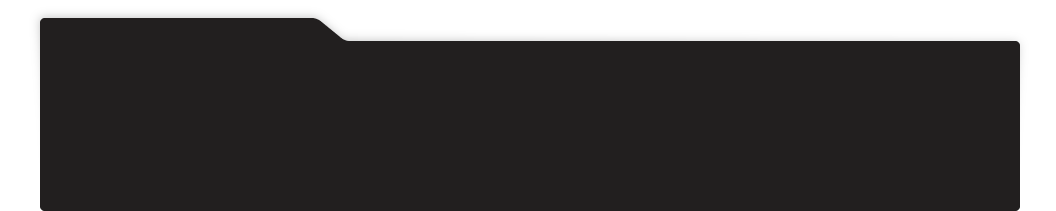
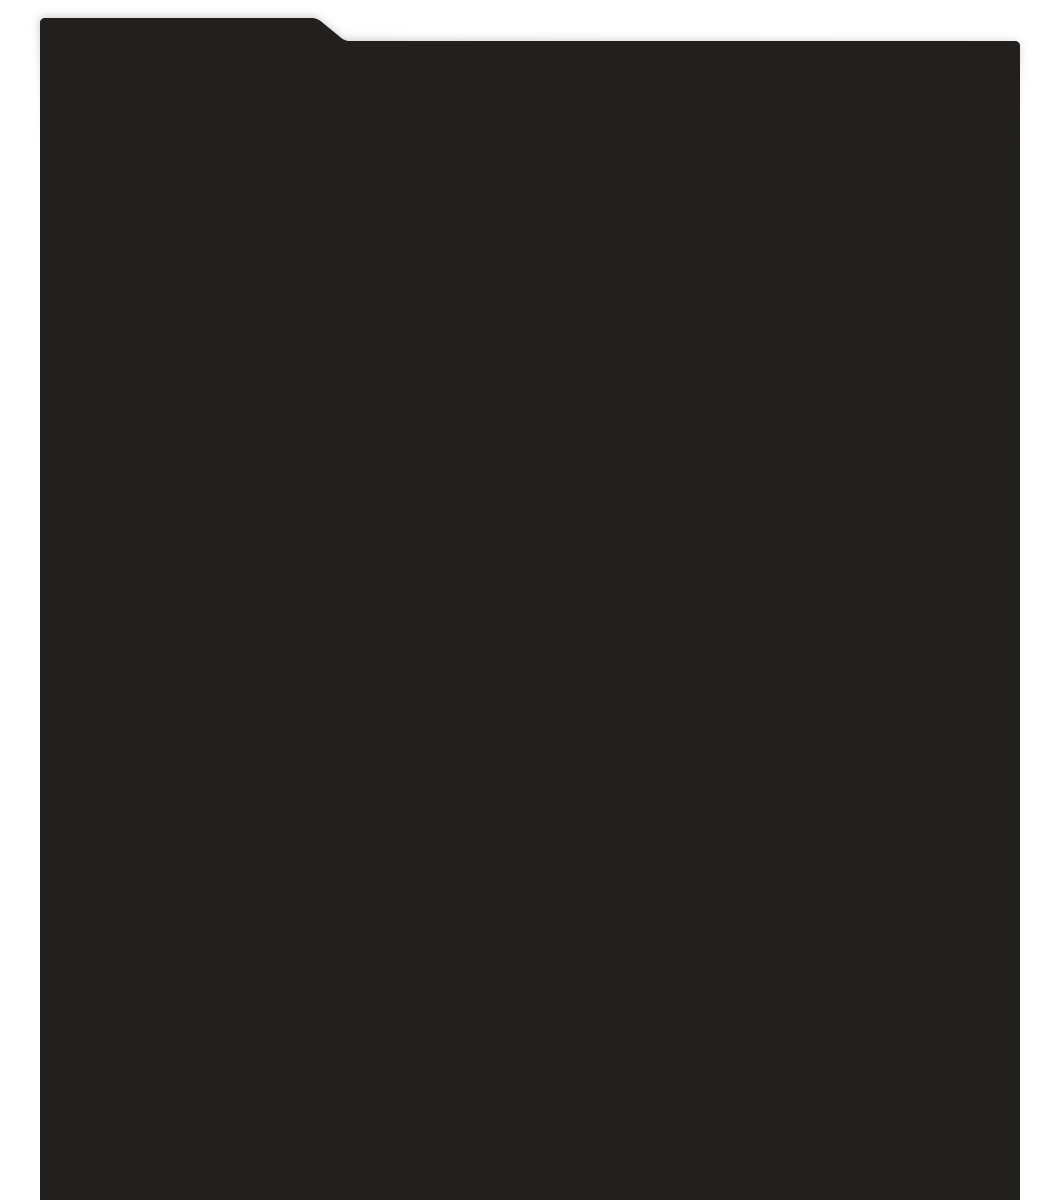
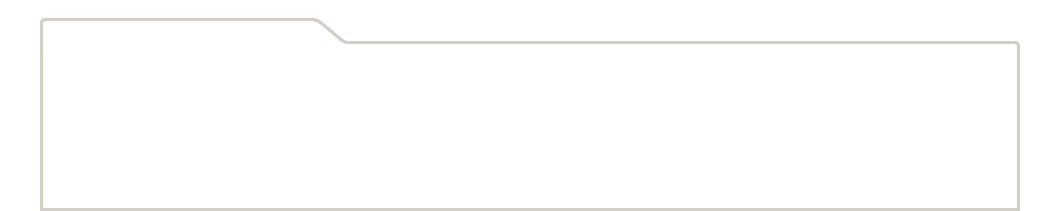
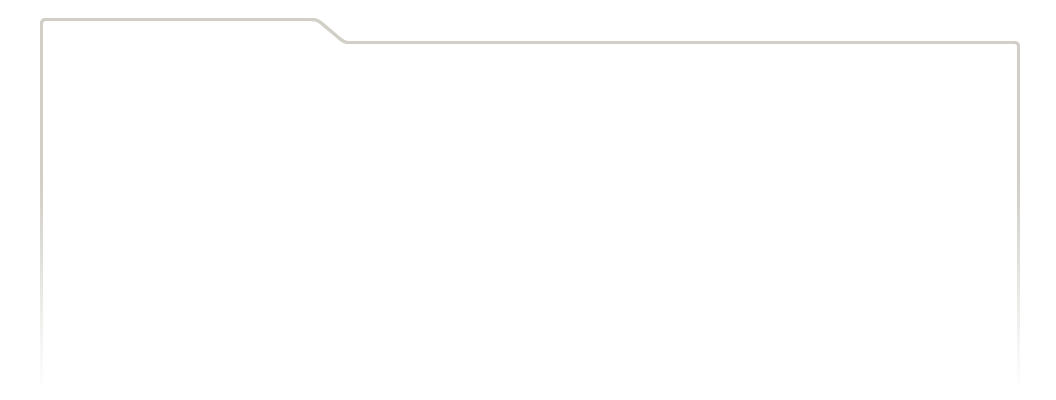
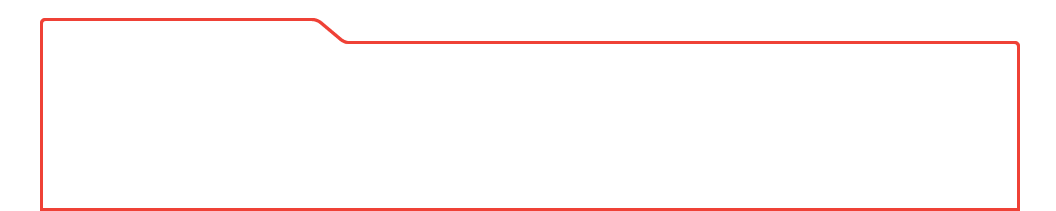
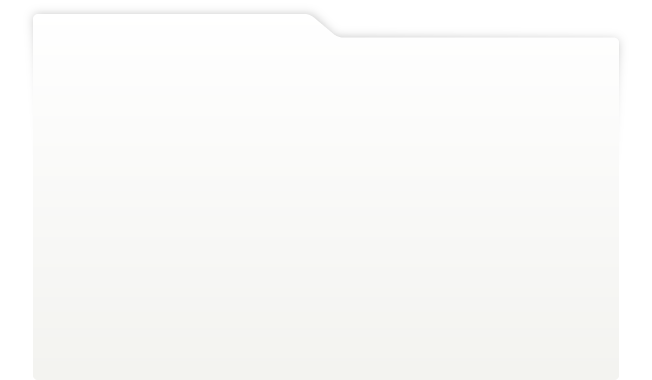
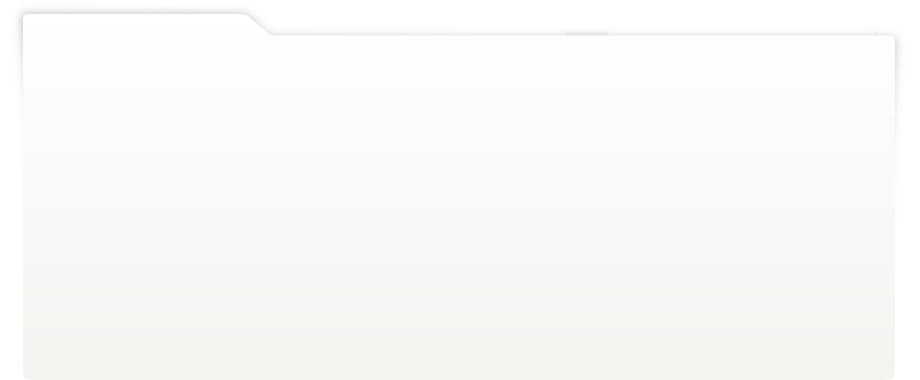
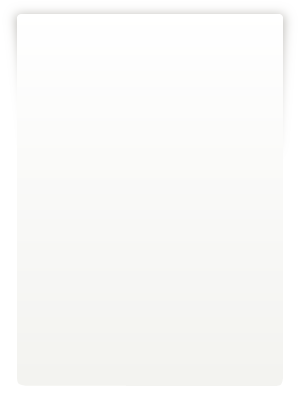
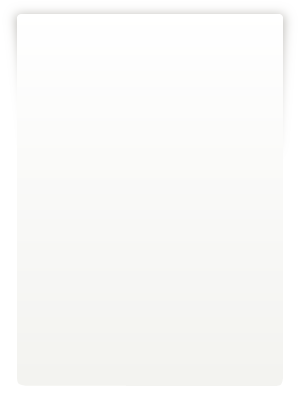
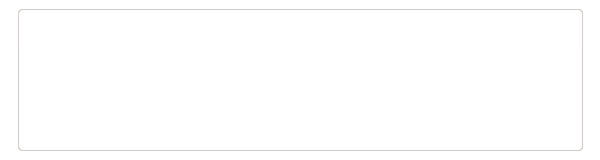
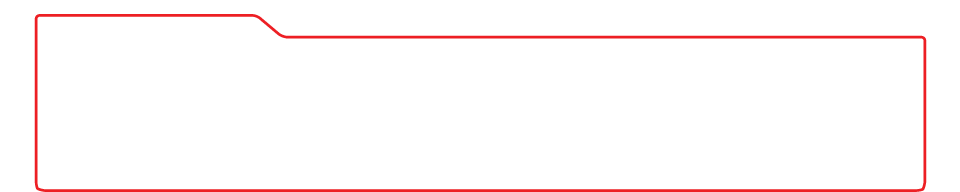
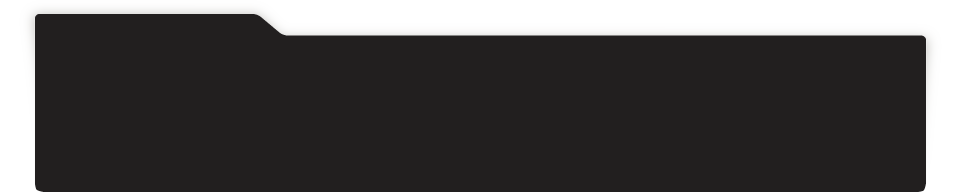
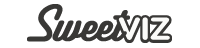
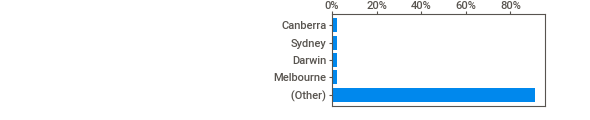
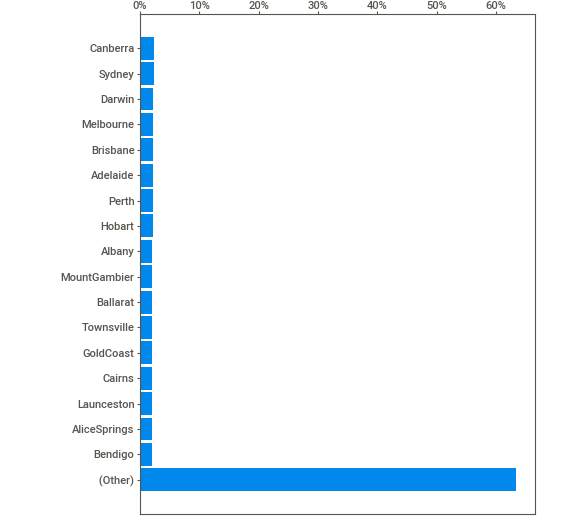
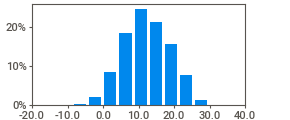
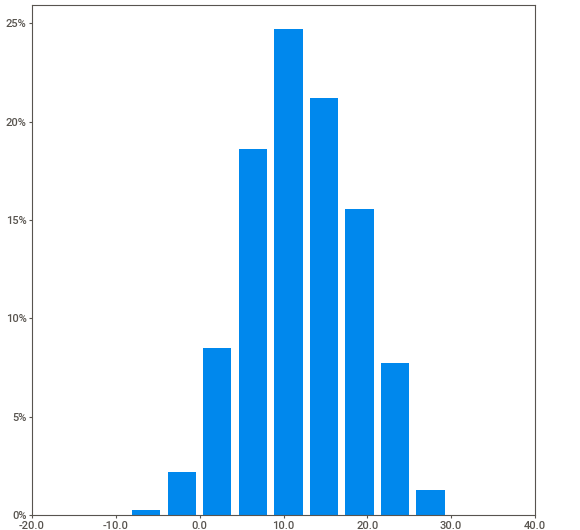
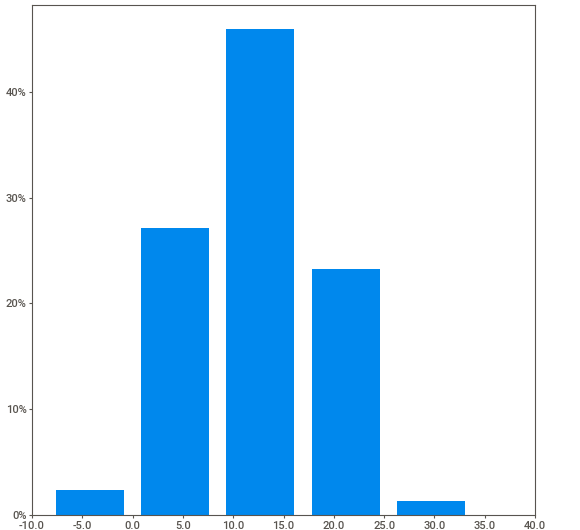
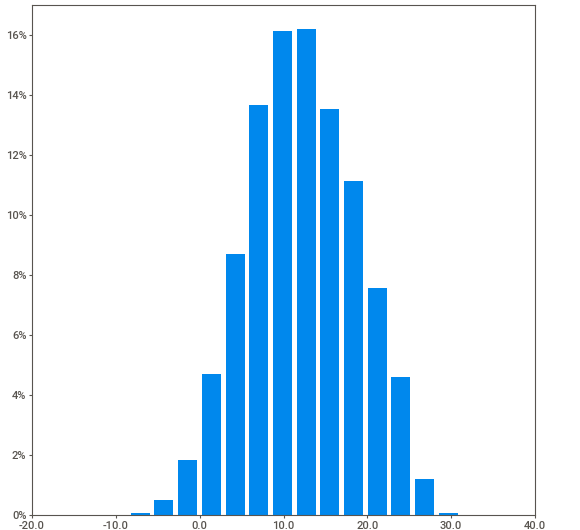
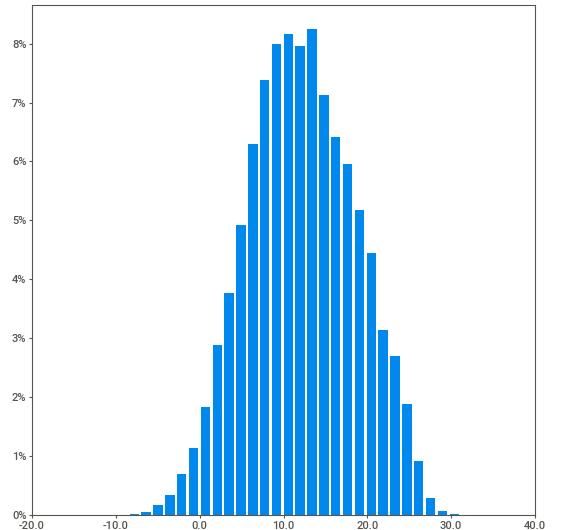
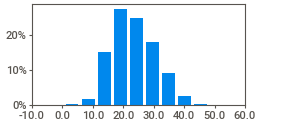
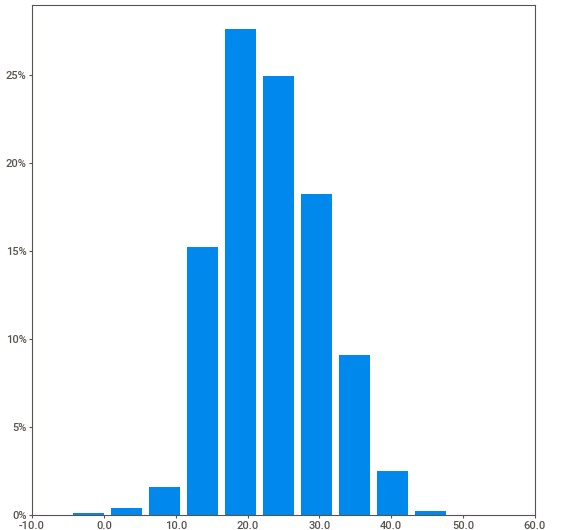
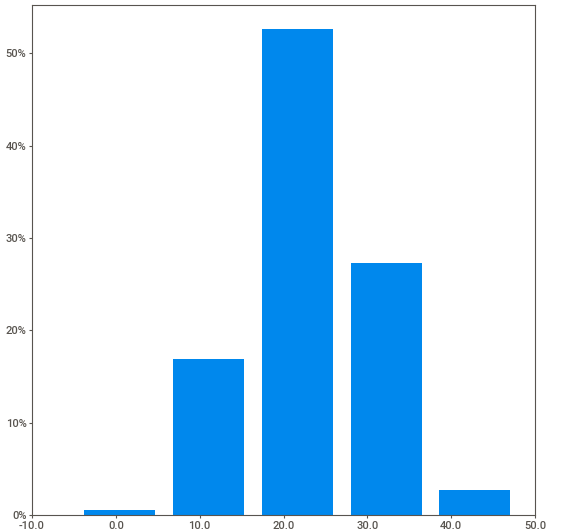
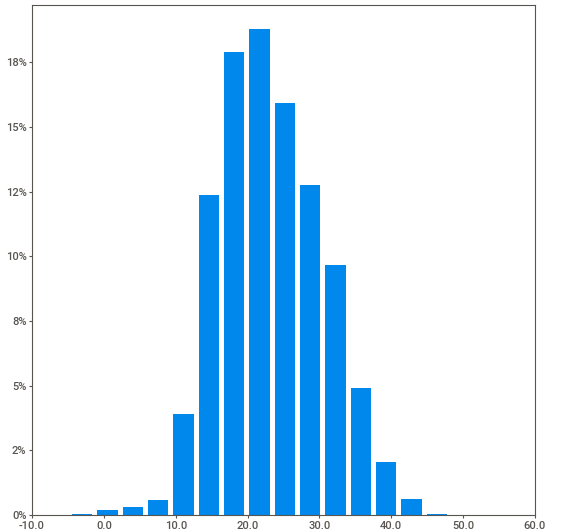
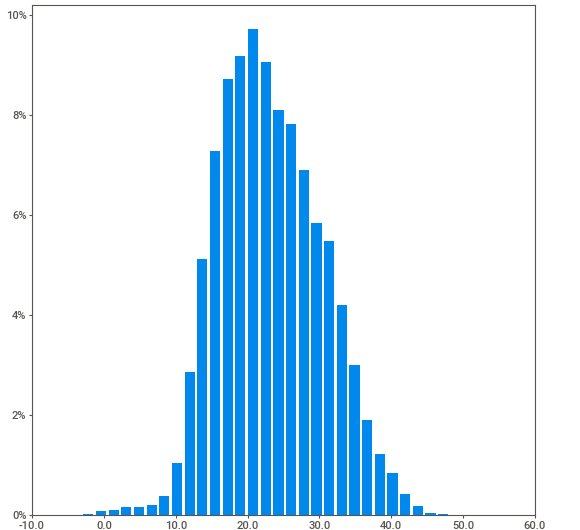
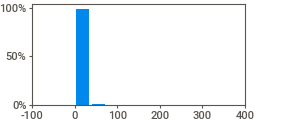
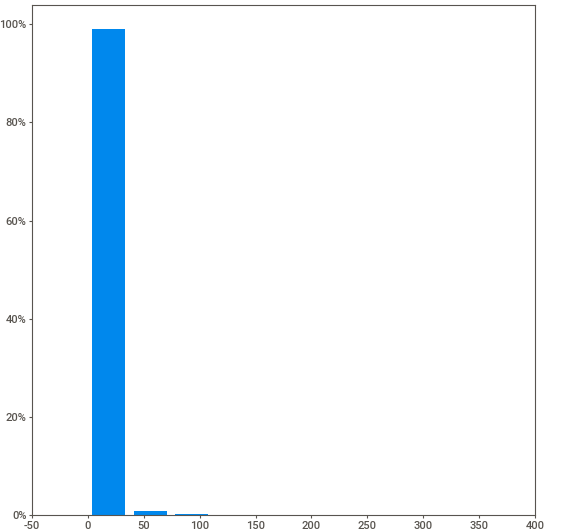
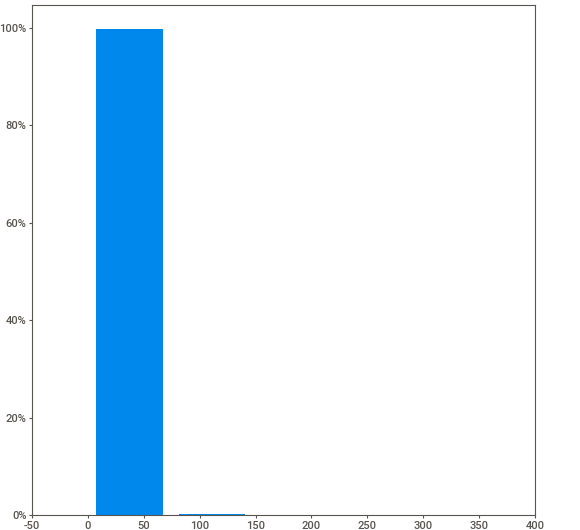
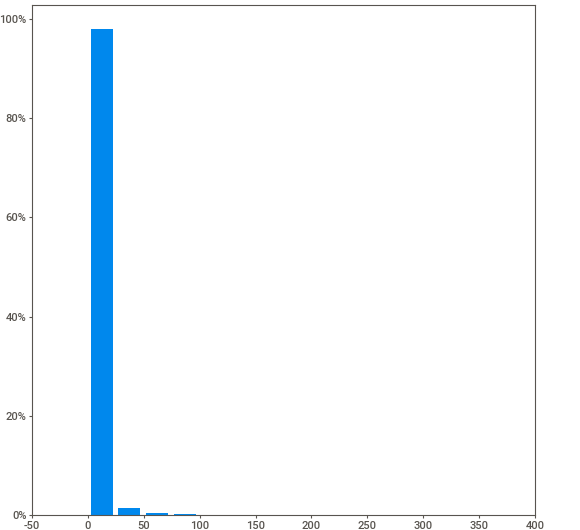
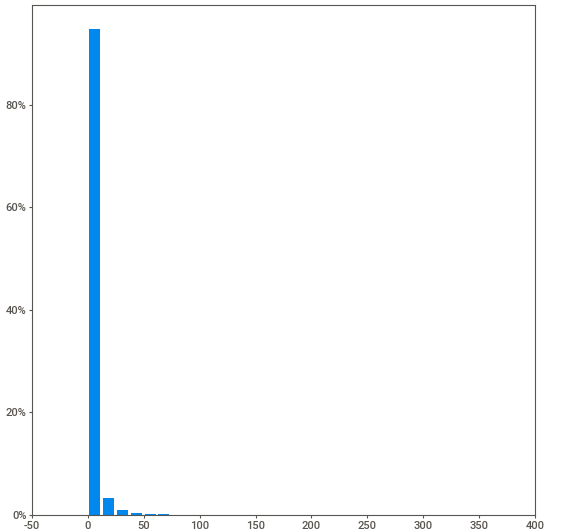
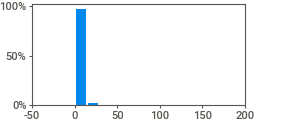
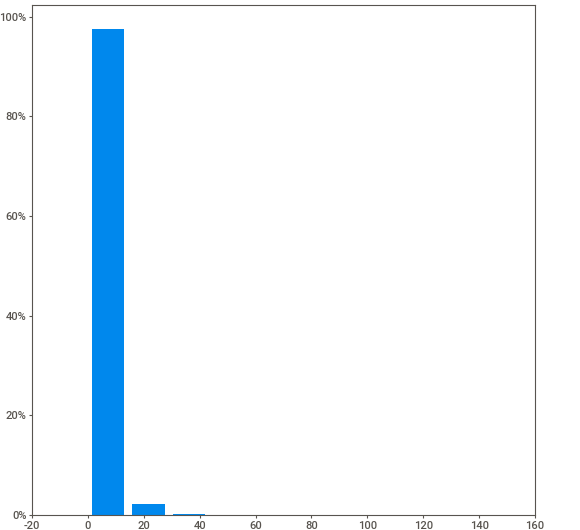
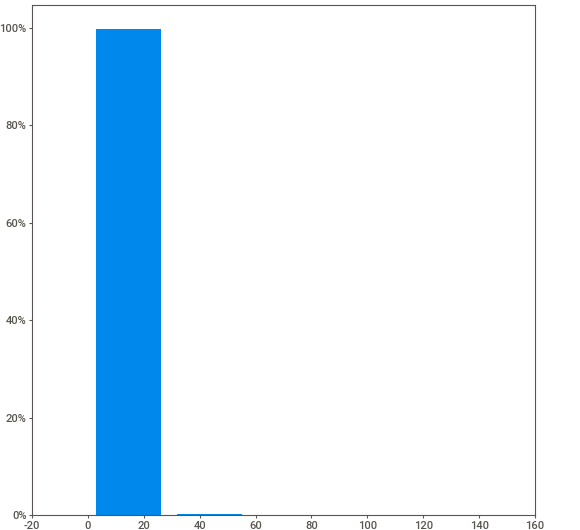
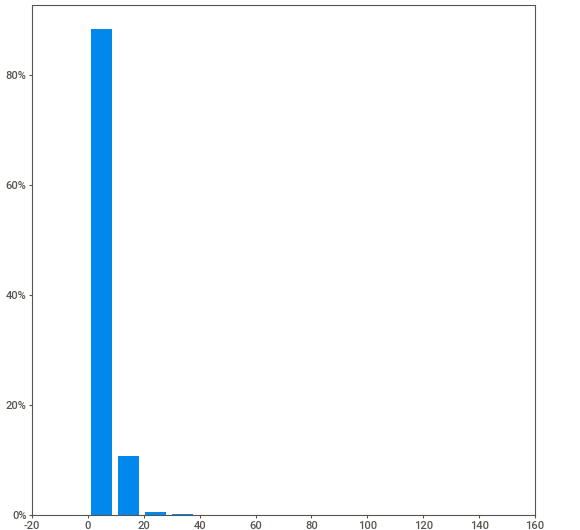
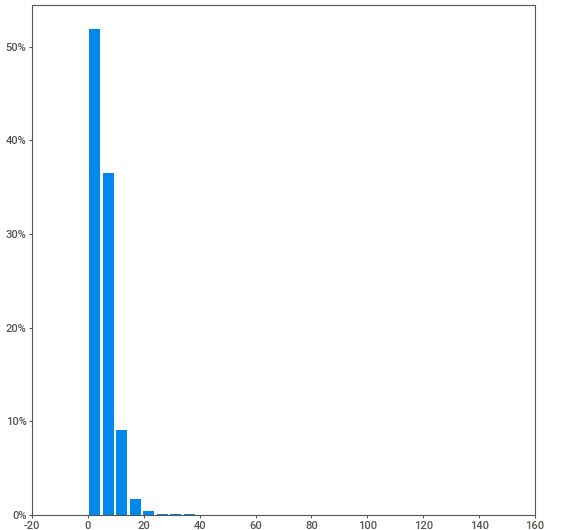
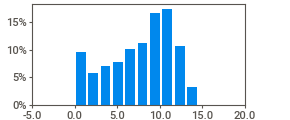
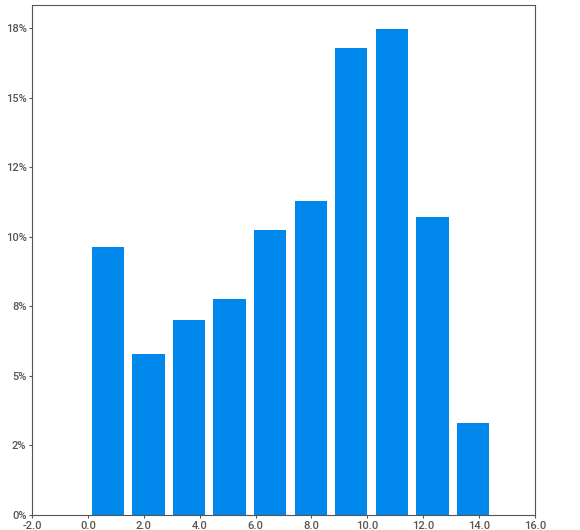
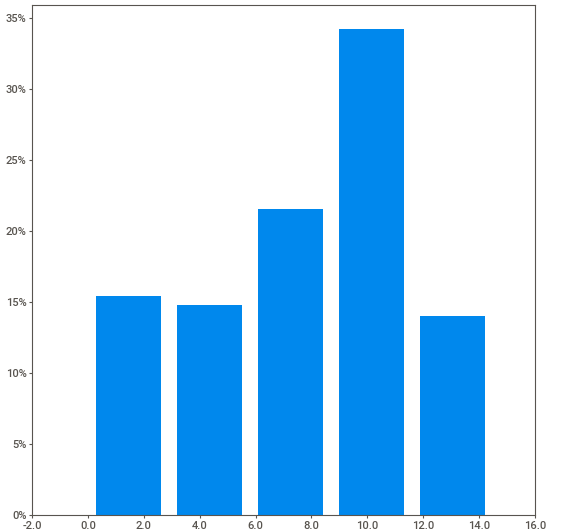
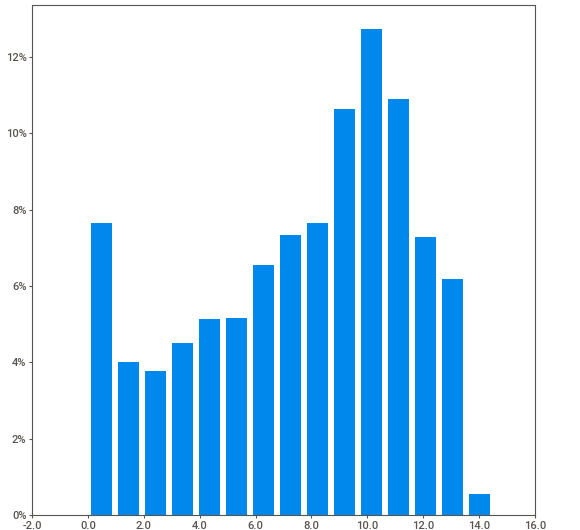
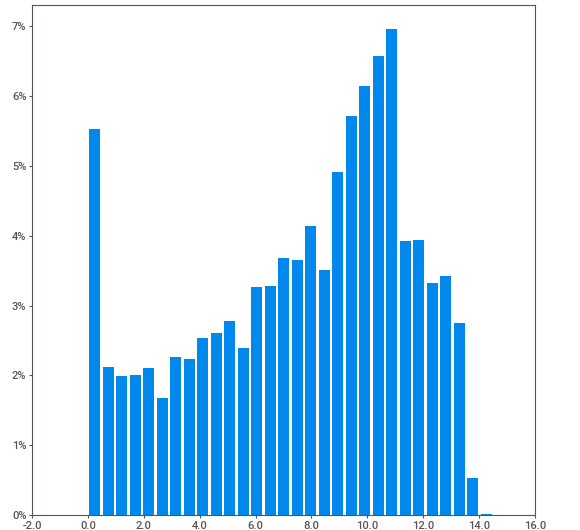
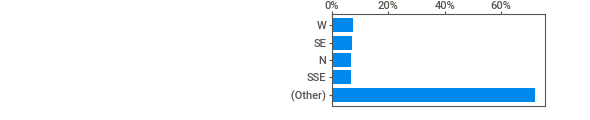
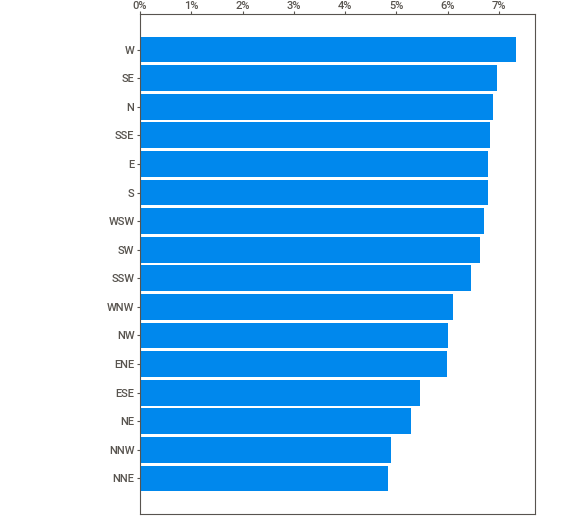
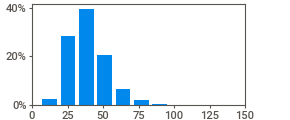
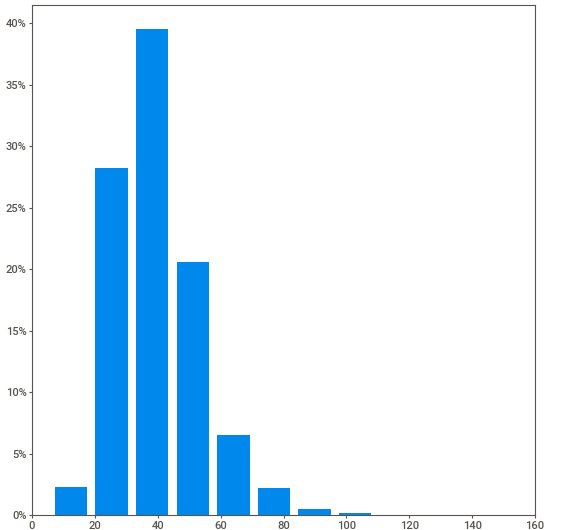
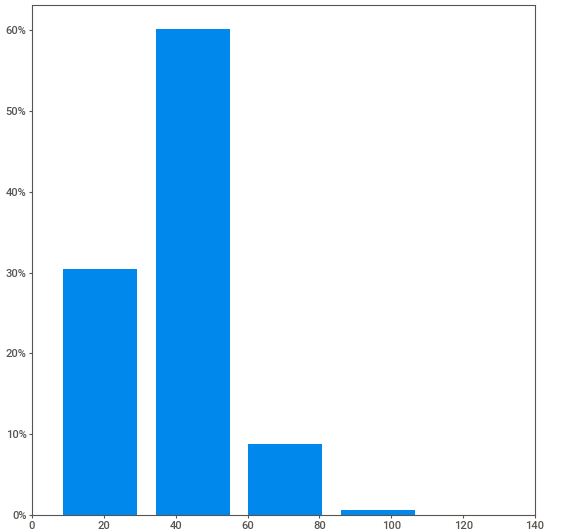
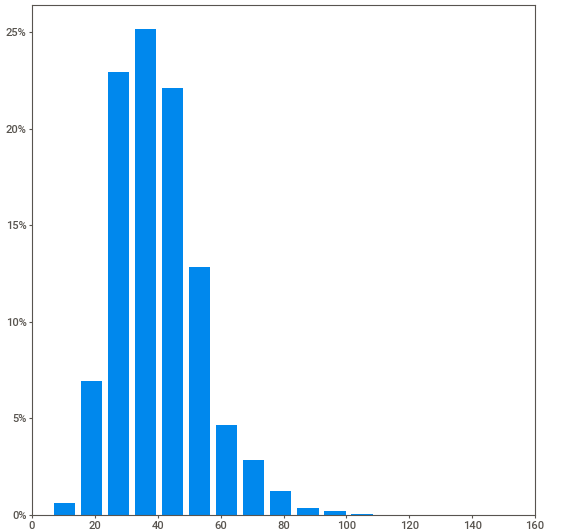
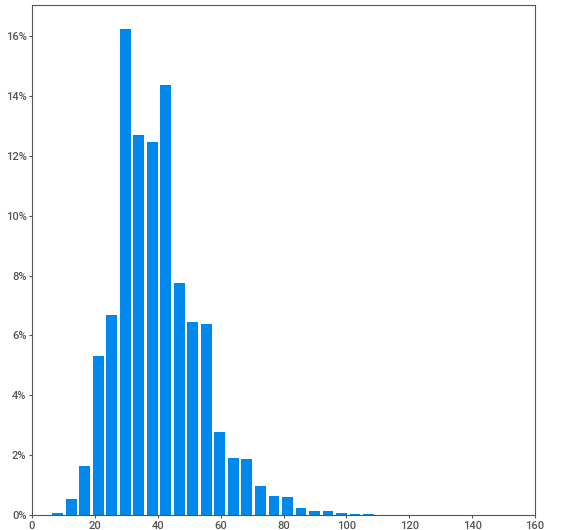
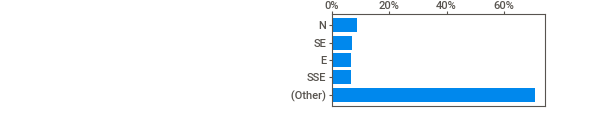
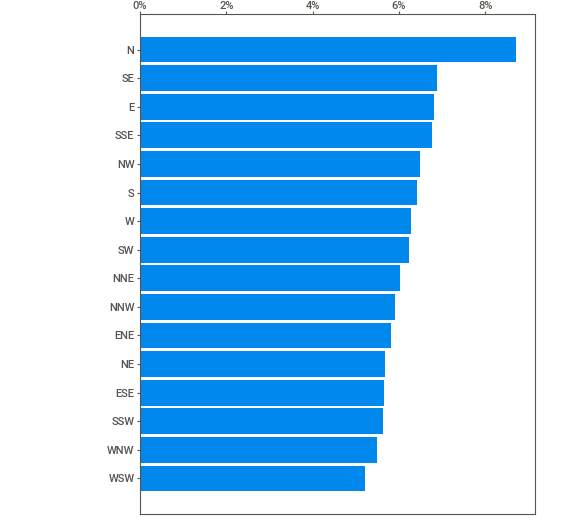
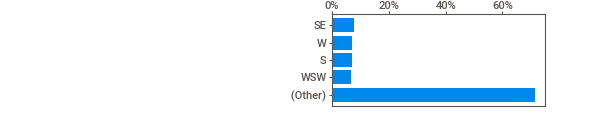
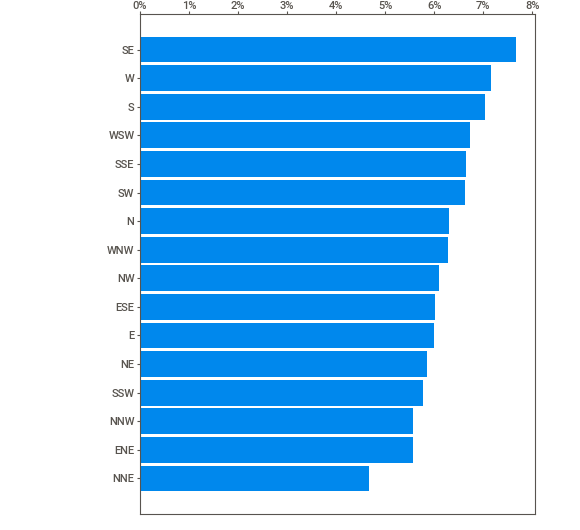
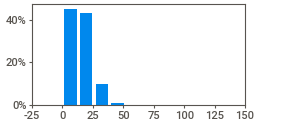
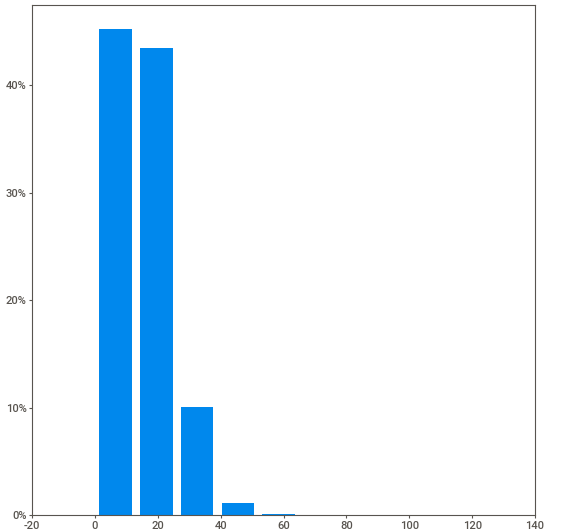
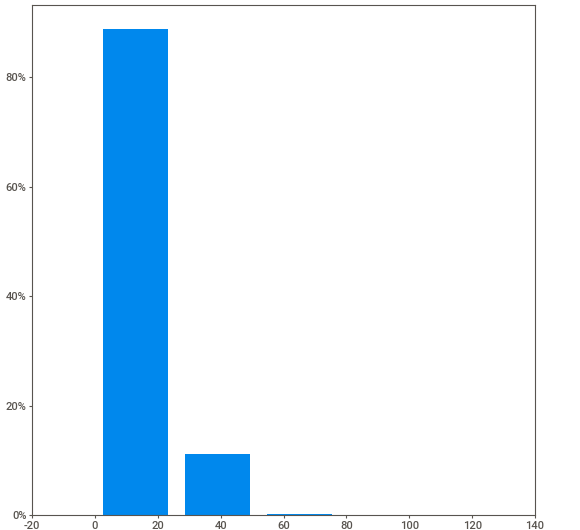
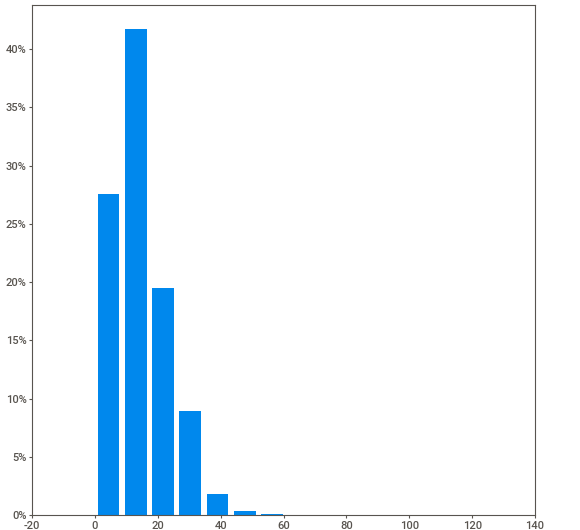
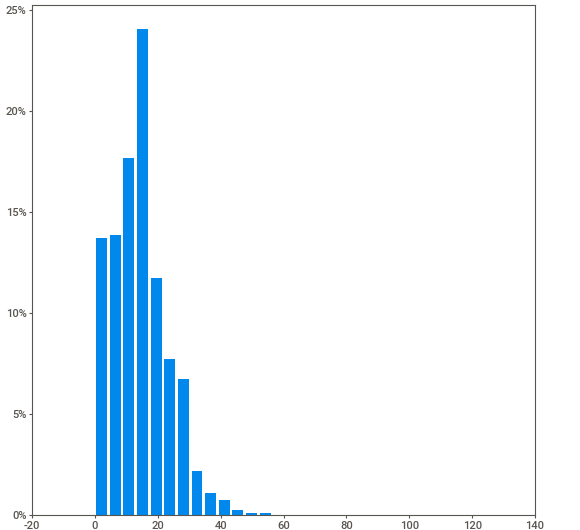
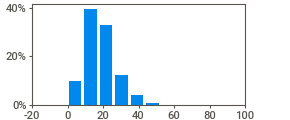
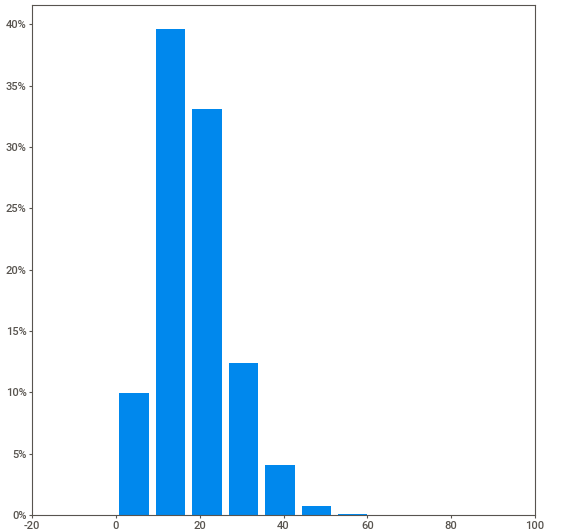
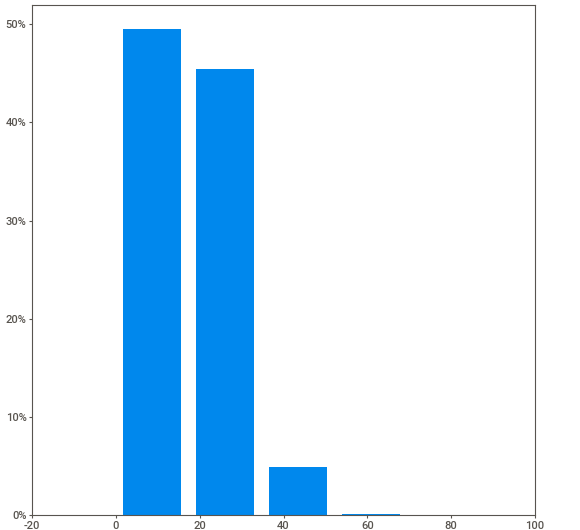
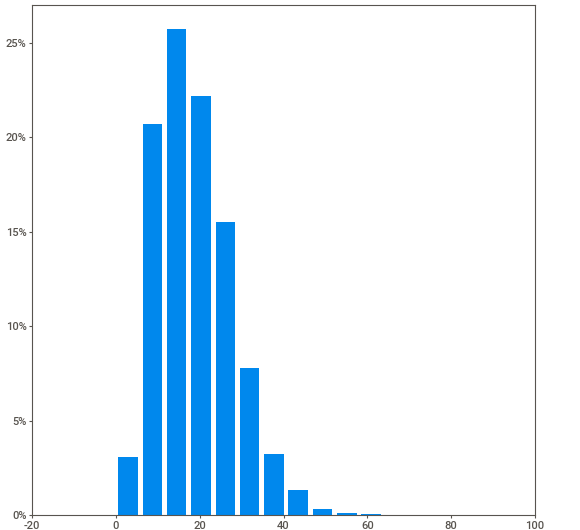
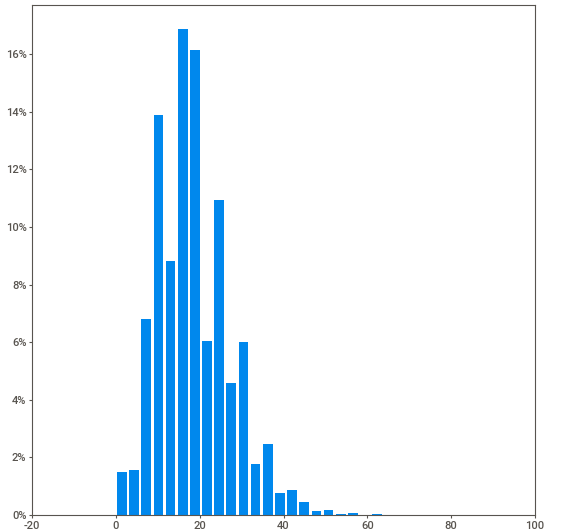
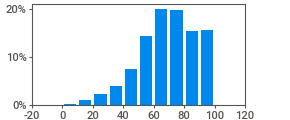
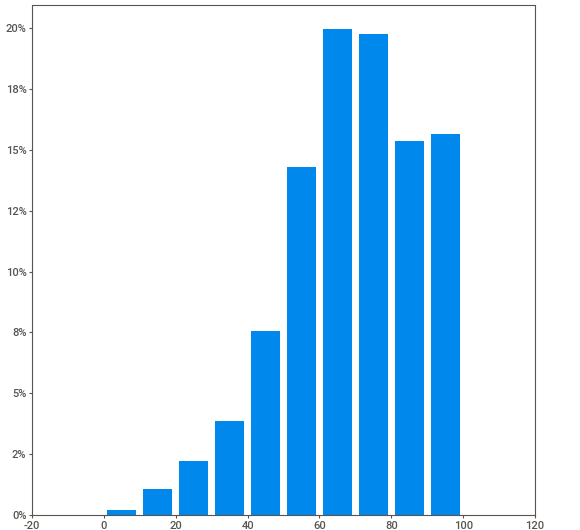
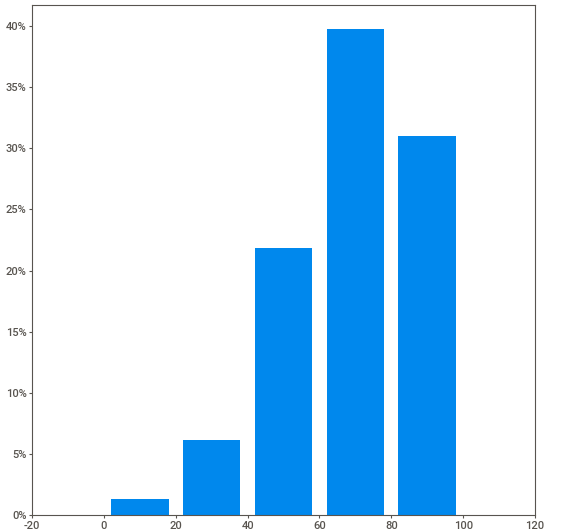
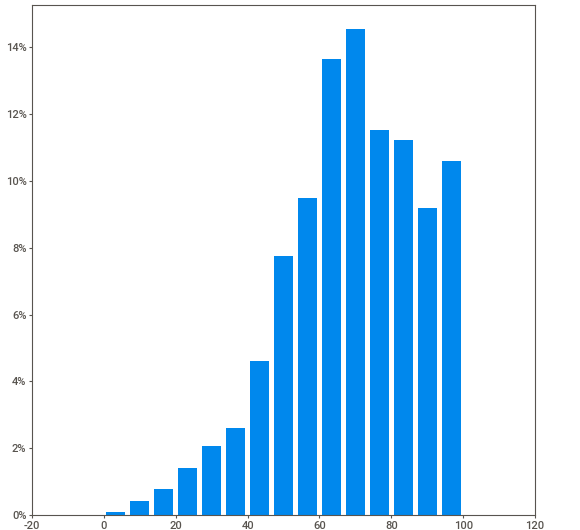
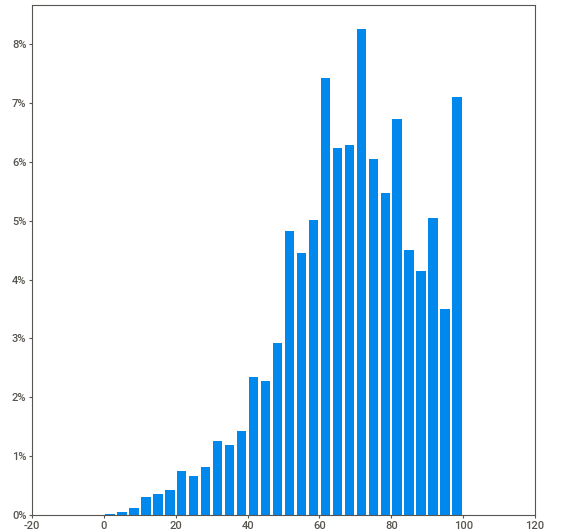
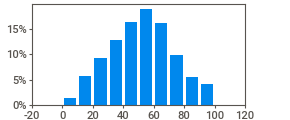
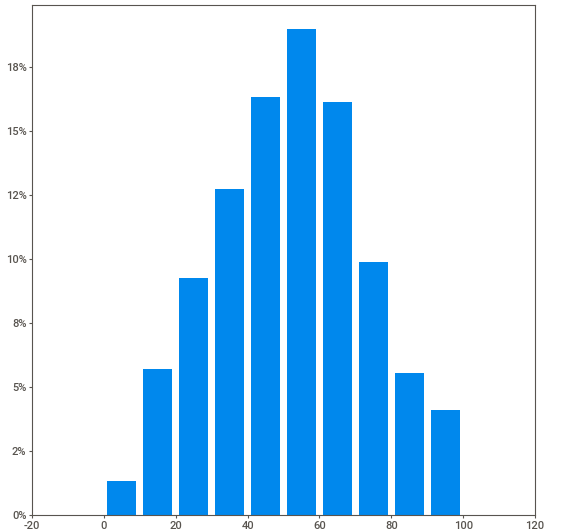
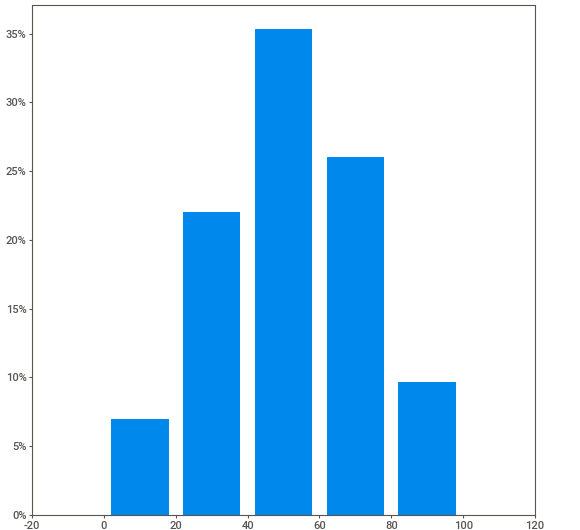
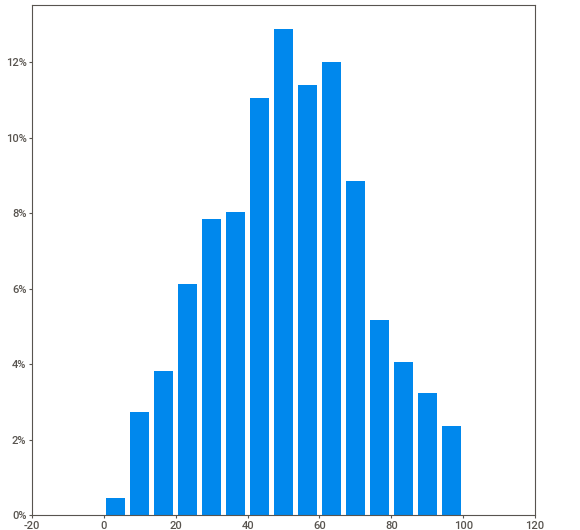
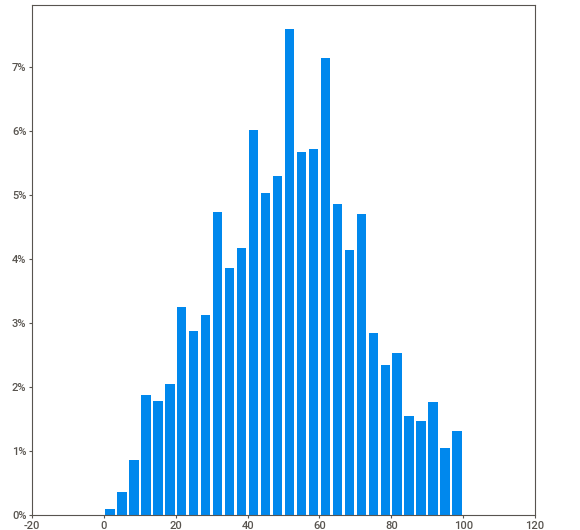
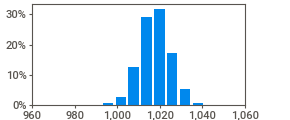
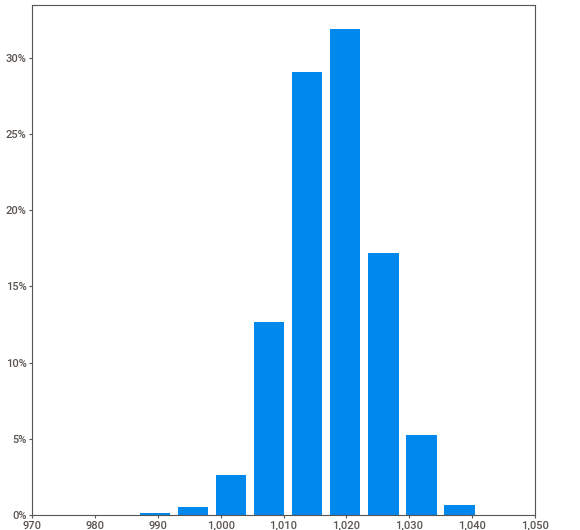
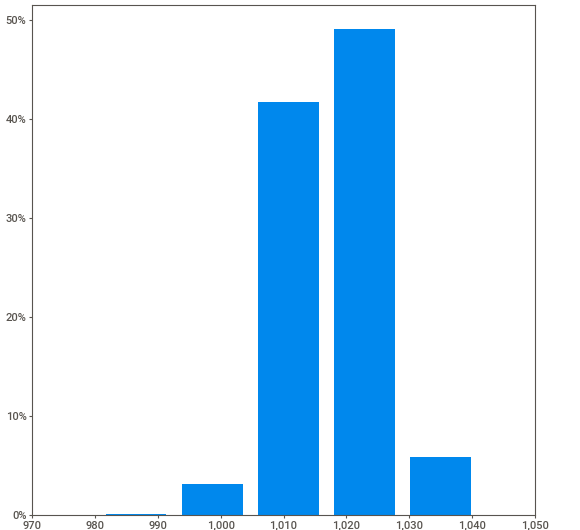
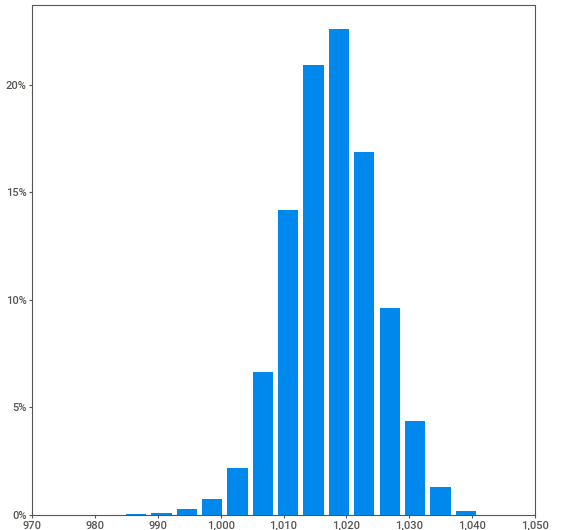
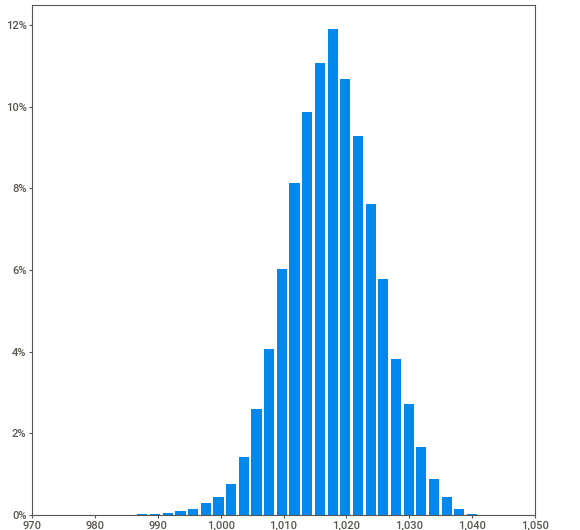
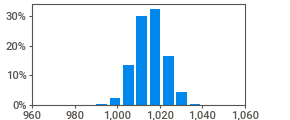
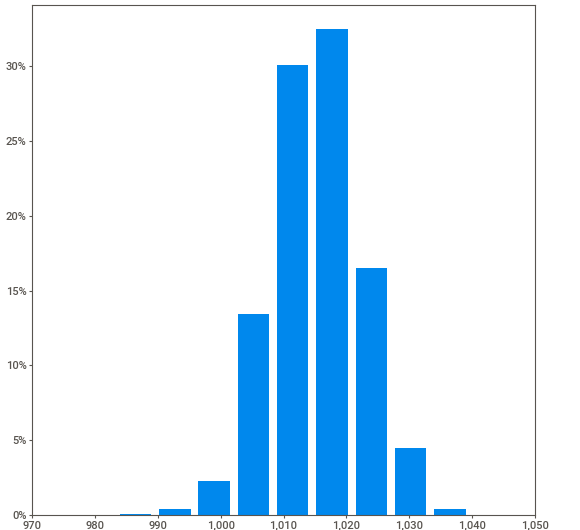
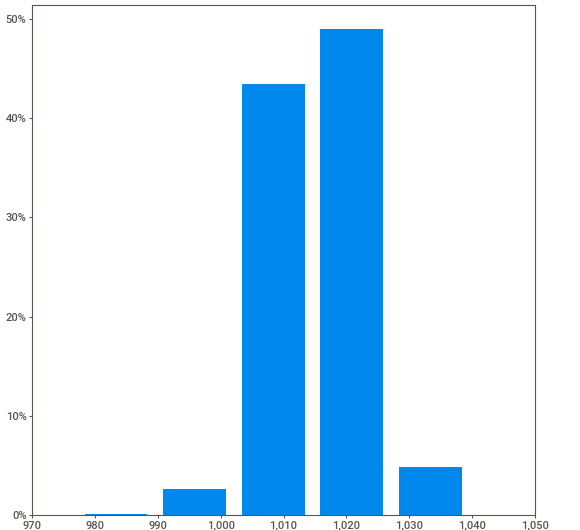
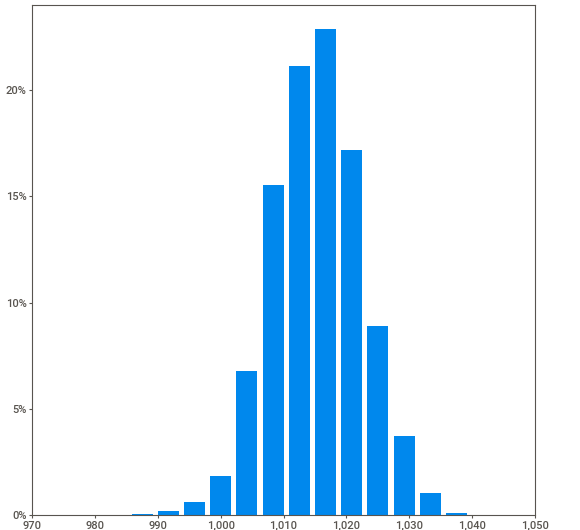
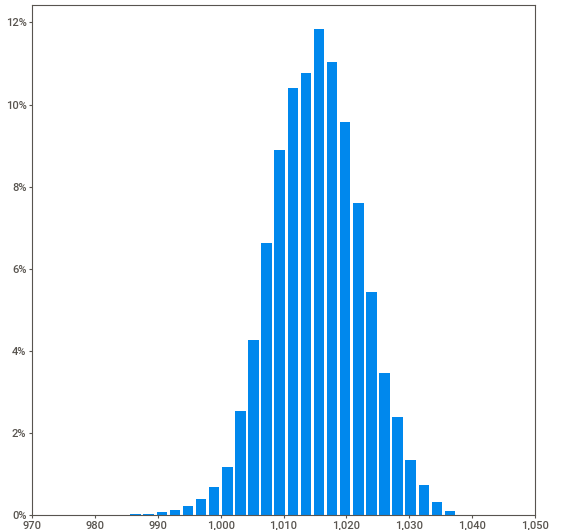
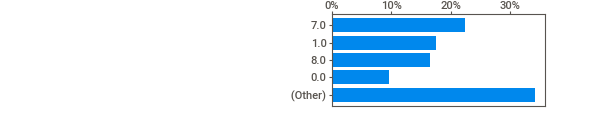
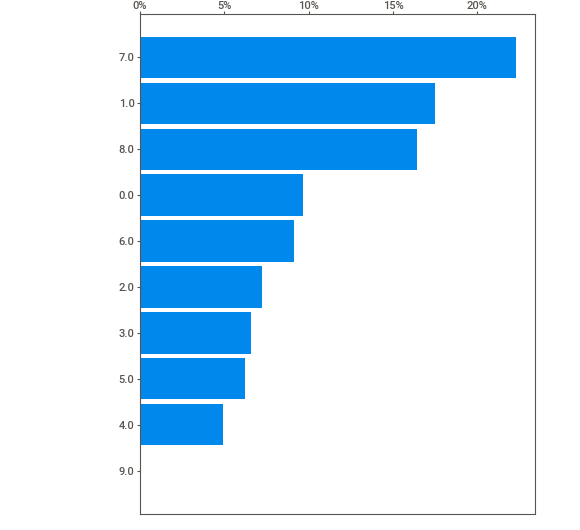
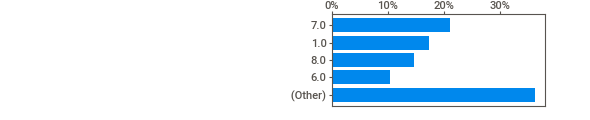
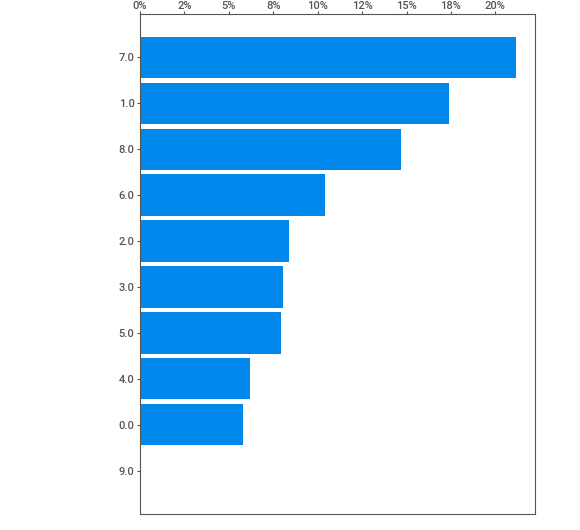
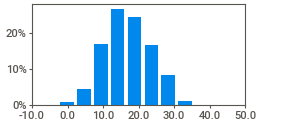
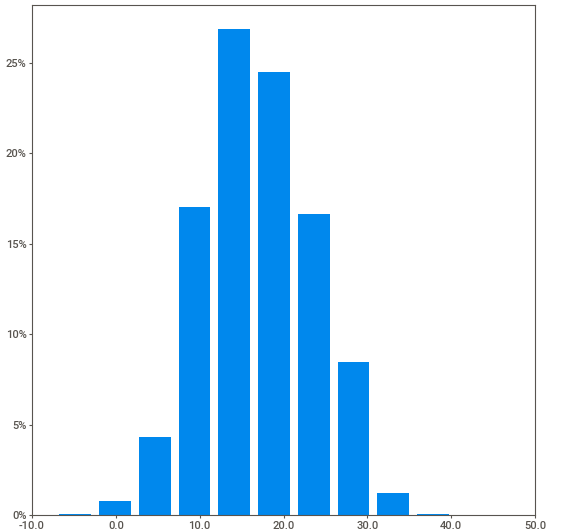
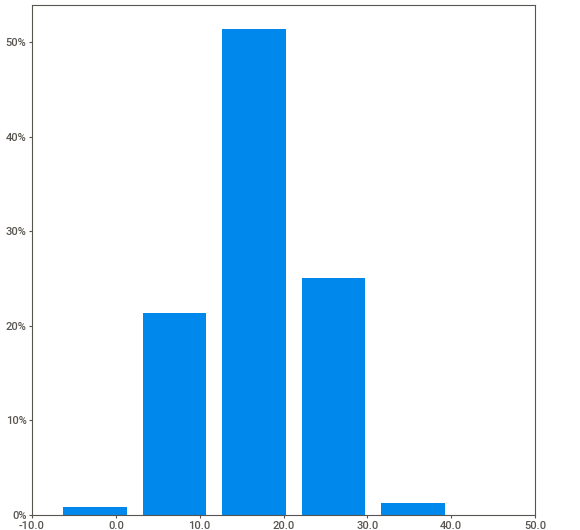
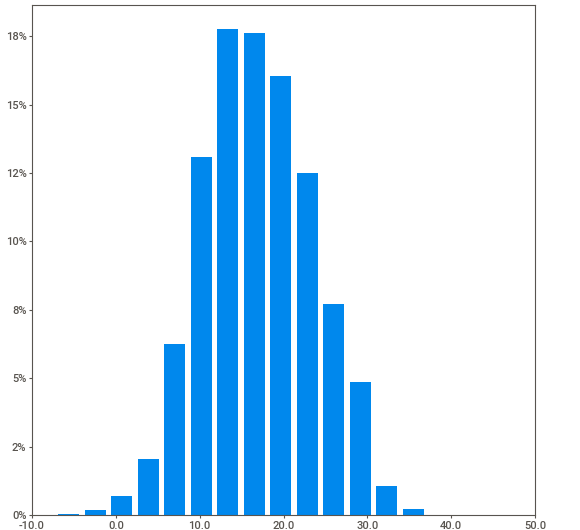
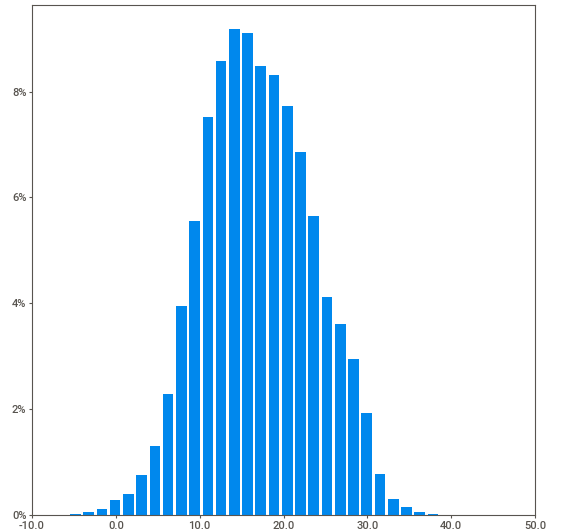
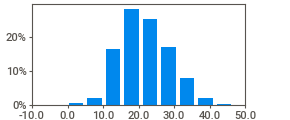
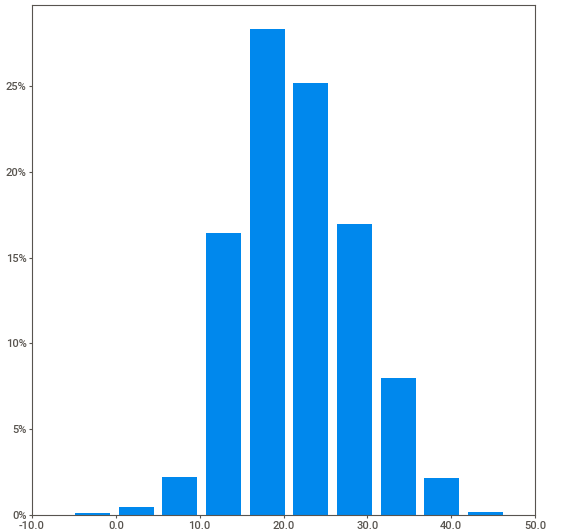
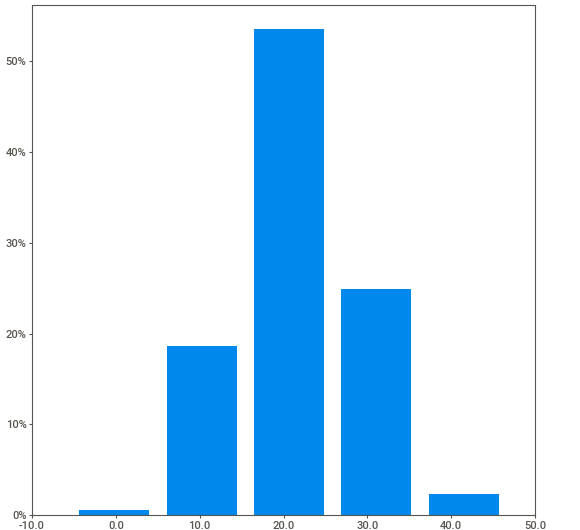
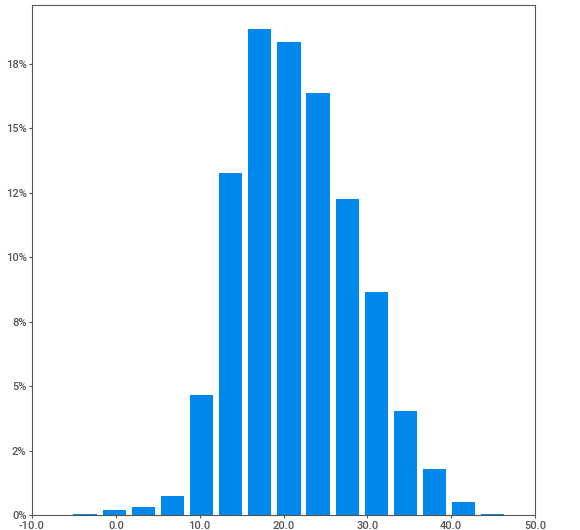
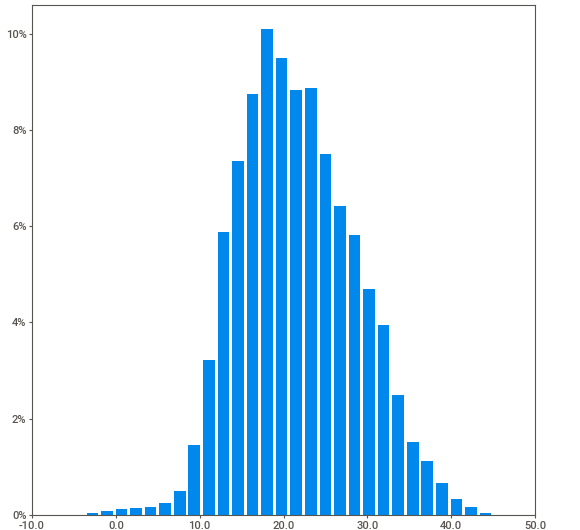
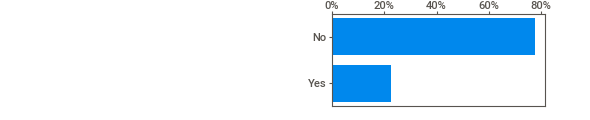
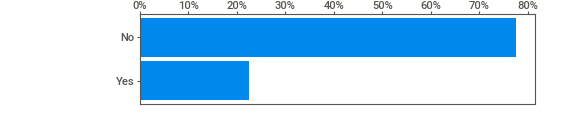
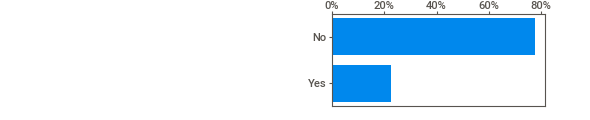
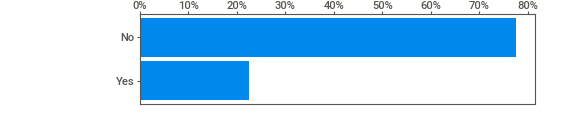
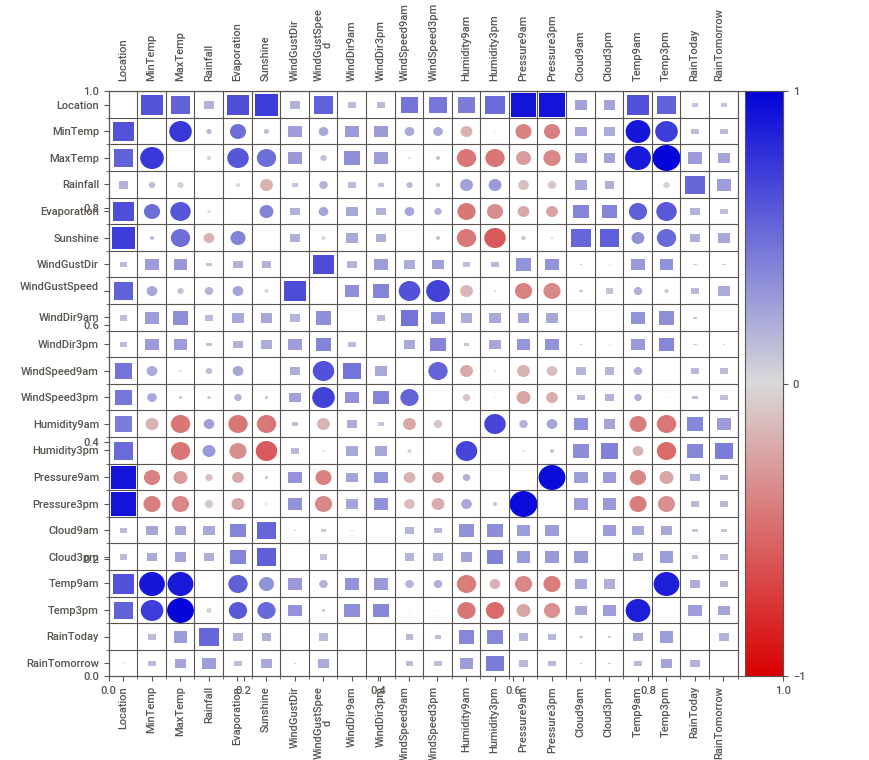
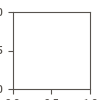

In [19]:
#Gerando um relatorio de analise exploratoria
report = sv.analyze(df)
report.show_notebook()

## Data Wrangling
Primeiro vamos formatar os dados da base de dados para prepará-lo para o modelo preditivo

In [20]:
#Tratamento de valores ausentes: Deletando as linhas com os valores ausentes das colunas "Raintoday" e "RainTomorrow"
df = df.dropna(subset=["RainToday", "RainTomorrow"])

#Deixando apenas as colunas Date, Location, MinTemp, MaxTemp, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm, RainToday, RainTomorrow
df = df[["Date", "Location", "MinTemp", "MaxTemp", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm", "RainToday", "RainTomorrow"]]
df = df.dropna()

# #Tratamento dos outliers e features engineering:
#MinTemp
df = df[(df["MinTemp"] >= -10) & (df["MinTemp"] <= 30)]

#MaxTemp
df = df[(df["MaxTemp"] >= 5) & (df["MaxTemp"] <= 40)]

#Humidity9am não possui outliers
#Humidity3pm não possui outliers

#Pressure9am
df = df[(df["Pressure9am"] >= 1000) & (df["Pressure9am"] <= 1035)]

#Pressure3pm
df = df[(df["Pressure3pm"] >= 1000) & (df["Pressure3pm"] <= 1035)]

#Temp9am
df = df[(df["Temp9am"] >= 5) & (df["Temp9am"] <= 30)]

#Temp3pm
df = df[(df["Temp3pm"] >= 8) & (df["Temp3pm"] <= 35)]

#Tratamento de variaveis categoricas 
df["RainToday"] = df["RainToday"].map({"Yes":1, "No":0})
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})

C:\Users\henri\AppData\Local\Temp\ipykernel_16668\722020476.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})


## EDA - Exploratory Data Analysis
Primeiro vamos analisar os dados que são fornecidos pela base de dados

### Colunas do dataset
- **Date** - A data da observação (formato: yyyy-mm-dd)
- **Location** - A localização da estação meteorológica (Nome da cidade - string)
- **MinTemp** - A temperatura mínima em graus Celsius (float)
- **MaxTemp** - A temperatura máxima em graus Celsius  (float)
- **Rainfall** - A quantidade de chuva medida em mm (float)
- **Evaporation** - A taxa de evaporação medida em mm (float)
- **Sunshine** - O número de horas de sol (float)
- **WindGustDir** - A direção da rajada de vento mais forte (string)
- **WindGustSpeed** - A velocidade (em km/h) da rajada de vento mais forte (float)
- **WindDir9am** - A direção do vento às 9am (string)
- **WindDir3pm** - A direção do vento às 3pm (string)
- **WindSpeed9am** - A velocidade do vento às 9am (em km/h) (float)
- **WindSpeed3pm** - A velocidade do vento às 3pm (em km/h) (float)
- **Humidity9am** - A umidade relativa às 9am (em %) (float)
- **Humidity3pm** - A umidade relativa às 3pm (em %) (float)
- **Pressure9am** - A pressão atmosférica reduzida ao nível do mar às 9am (em hpa) (float)
- **Pressure3pm** - A pressão atmosférica reduzida ao nível do mar às 3pm (em hpa) (float)
- **Cloud9am** - A fração de cobertura de nuvens às 9am (em oitavos) (float)
- **Cloud3pm** - A fração de cobertura de nuvens às 3pm (em oitavos) (float)
- **Temp9am** - A temperatura às 9am em graus Celsius (float)
- **Temp3pm** - A temperatura às 3pm em graus Celsius (float)
- **RainToday** - Se choveu (precipitação acima de 1mm) ou não (string)
- **RainTomorrow** - A variável alvo. Se choverá ou não amanhã (string)


In [21]:
# Verificando as métricas do dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,113907.0,12.288644,5.899395,-5.3,7.9,12.0,16.6,29.1
MaxTemp,113907.0,23.033679,6.137234,8.5,18.2,22.7,27.7,39.9
Humidity9am,113907.0,69.108580,17.787447,1.0,58.0,70.0,82.0,100.0
Humidity3pm,113907.0,52.063473,19.886771,1.0,38.0,52.0,66.0,100.0
Pressure9am,113907.0,1018.047613,6.470467,1000.0,1013.6,1018.0,1022.5,1035.0
Pressure3pm,113907.0,1015.704885,6.359895,1000.0,1011.2,1015.6,1020.1,1034.9
Temp9am,113907.0,16.960602,5.715303,5.0,12.6,16.7,21.2,30.0
Temp3pm,113907.0,21.536011,5.985193,8.0,16.9,21.2,26.0,35.0
RainToday,113907.0,0.227466,0.419198,0.0,0.0,0.0,0.0,1.0
RainTomorrow,113907.0,0.220048,0.414281,0.0,0.0,0.0,0.0,1.0


VARIÁVEIS NUMÉRICAS


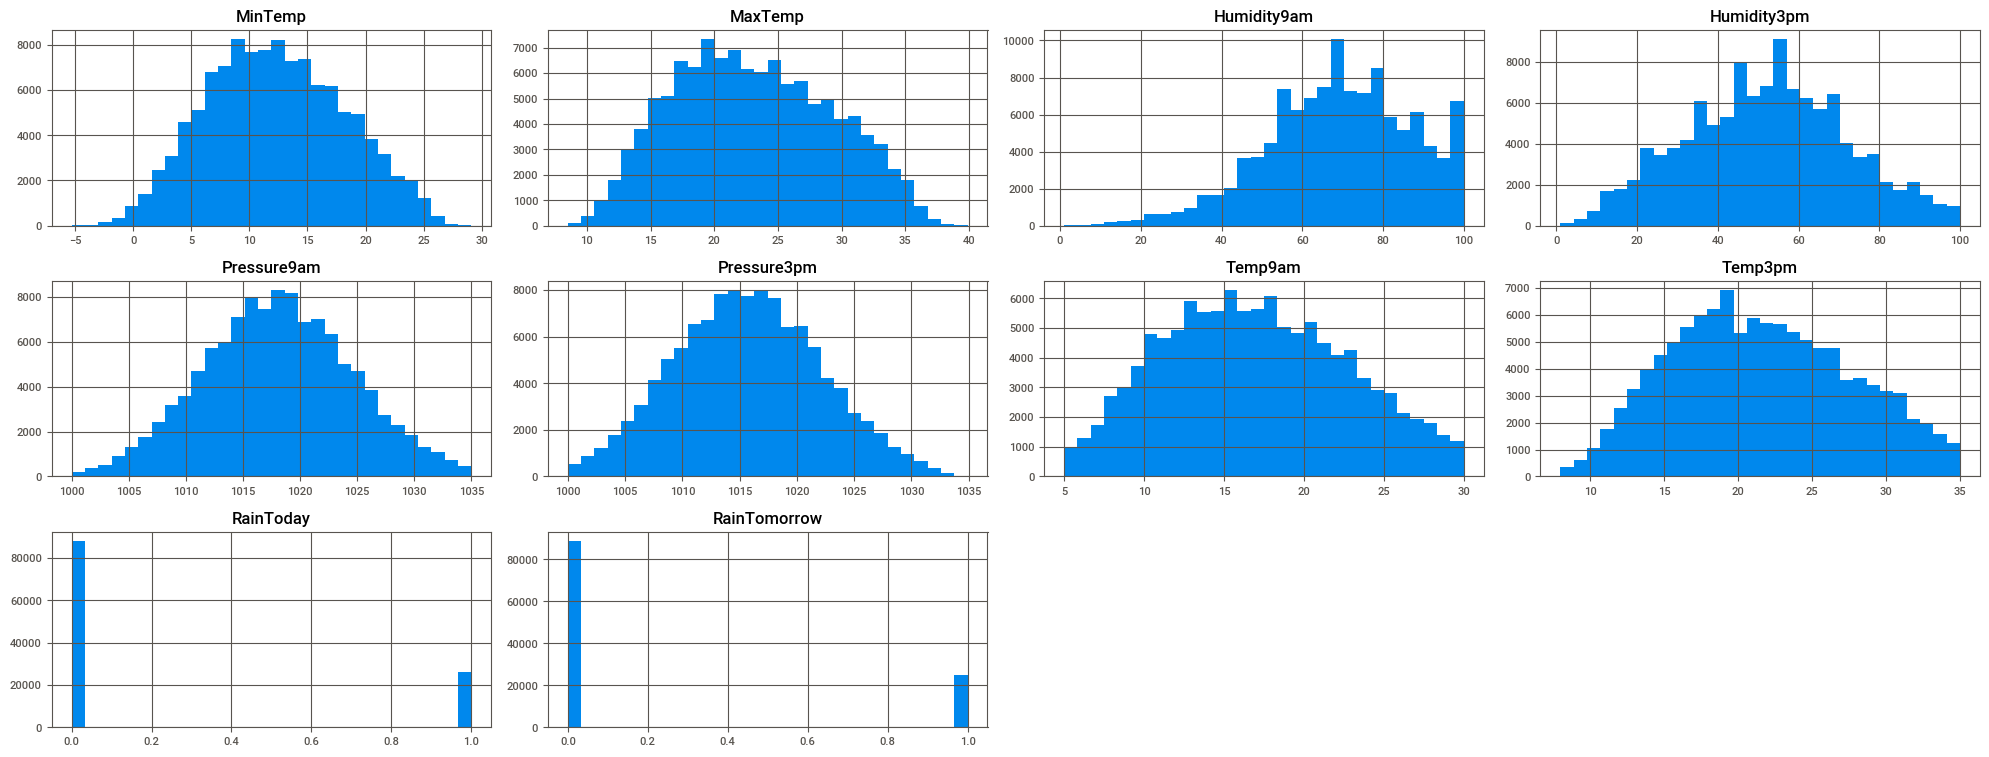

In [22]:
# Estatísticas descritivas do DataFrame
df.describe()

print("VARIÁVEIS NUMÉRICAS")
# Distribuição das variáveis numéricas
df.hist(bins=30, figsize=(20, 15), layout=(6, 4))
plt.tight_layout()
plt.show()

# print("VARIÁVEIS CATEGÓRICAS")
# # Contagem das variáveis categóricas do DataFrame
# plt.figure(figsize=(20, 15))
# for i, column in enumerate(df.select_dtypes(include='object').columns, 1):
#     plt.subplot(3, 3, i)
#     sns.countplot(data=df, y=column)
#     plt.title(f'{column} Count')
#     plt.xticks(rotation=45)

In [23]:
df.shape


(113907, 12)

In [24]:
df.head()

,Date,Location,MinTemp,MaxTemp,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [25]:
#Filtrando o dataset para a cidade de Sydney
df = df[df["Location"] == "Sydney"]

#Ordenando o dataset pela coluna Date
df = df.sort_values("Date")

In [69]:
#Dividindo o dataset em train test e validação
#Treinamento: 60%
#Teste: 20%
#Validação: 20%

#quantidade de linhas do dataset
n_lines = df.shape[0]

#separando o dataset em treinamento, teste e validação
train = df[0:int(n_lines*0.6)]
validation = df[int(n_lines*0.6):int(n_lines*0.8)]
test = df[int(n_lines*0.8):]


In [70]:
def make_x_y(df):
    df = df.drop(["Date", "Location"], axis=1)
    x = df.drop("RainTomorrow", axis=1).copy()
    y = df["RainTomorrow"].copy()
    return x, y
x_train, y_train = make_x_y(train)
x_validation, y_validation = make_x_y(validation)
x_test, y_test = make_x_y(test)

In [71]:
def make_windows(x, y, columns_orig, window_size):
    x_window = []
    y_window = []
    for i in range(len(x)-window_size-1):
        x_window.append(x[i:i+window_size].reshape(-1))
        y_window.append(y[i+window_size])

    columns = []
    for i in range(window_size):
        for column in columns_orig:
            columns.append(f"{column}_{i}")
    return np.array(x_window), np.array(y_window), columns

window = 7
columns_orig = train.columns[2:-1]
x_train, y_train, columns = make_windows(x_train.values, y_train.values, columns_orig, window)
x_validation, y_validation, _ = make_windows(x_validation.values, y_validation.values, columns_orig, window)

In [86]:
pd.Series(y_validation).value_counts(normalize=True)

0    0.72943
1    0.27057
Name: proportion, dtype: float64

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler  # biblioteca necessária para balanceamento

# Reamostragem da classe minoritária
ros = RandomOverSampler(sampling_strategy='minority')
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)

# Modelos com ajuste de peso para desbalanceamento
modelos = {
    "RandomForest_balanced": RandomForestClassifier(n_estimators=1000, max_depth=10, class_weight="balanced"),
    "GradientBoosting_balanced": GradientBoostingClassifier(n_estimators=100),
    "LogisticRegression_balanced": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "SVC_balanced": SVC(kernel="linear", class_weight="balanced"),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Treinar e avaliar cada modelo
for nome, modelo in modelos.items():
    print(f"\nModelo: {nome}")
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", modelo)
    ])
    
    pipeline.fit(x_resampled, y_resampled)
    y_pred_val = pipeline.predict(x_validation)
    
    # Métricas
    print("Matriz de Confusão:")
    print(confusion_matrix(y_validation, y_pred_val))
    print("\nRelatório de Classificação:")
    print(classification_report(y_validation, y_pred_val))
    print("\nAcurácia:", accuracy_score(y_validation, y_pred_val))


Modelo: RandomForest_balanced
Matriz de Confusão:
[[427  34]
 [134  37]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       461
           1       0.52      0.22      0.31       171

    accuracy                           0.73       632
   macro avg       0.64      0.57      0.57       632
weighted avg       0.70      0.73      0.69       632


Acurácia: 0.7341772151898734

Modelo: GradientBoosting_balanced
Matriz de Confusão:
[[367  94]
 [102  69]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       461
           1       0.42      0.40      0.41       171

    accuracy                           0.69       632
   macro avg       0.60      0.60      0.60       632
weighted avg       0.69      0.69      0.69       632


Acurácia: 0.689873417721519

Modelo: LogisticRegression_balanced
Matriz de Confusão:
[[318 143]
 [ 72  99